- **VERY IMPORTANT**: emphasise that this is SW ERF decomp. only. Do LW using cloud masking.
- we should verify using the radiative kernels that the SW non-cloud, non-aerosol adjustments are ~ 0 **in CMIP6, they are**

In [1]:
from __future__ import division
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as pl
import pandas as pd
from matplotlib import gridspec, rc
from matplotlib.lines import Line2D
from netCDF4 import Dataset
import warnings

In [2]:
#%matplotlib inline

pl.rcParams['figure.figsize'] = (9/2.54, 9/2.54)
pl.rcParams['font.size'] = 9
pl.rcParams['font.family'] = 'Arial'
pl.rcParams['figure.dpi'] = 150
pl.rcParams['xtick.direction'] = 'out'
pl.rcParams['xtick.minor.visible'] = True
pl.rcParams['ytick.major.left'] = False
pl.rcParams['xtick.top'] = True

In [3]:
# # # add models from Zelinka 14
z14_data = np.array([
    [-0.66, 0.28, -0.24, -0.01, 0.15, 0.01, -0.22], #'IPSL-CM5A-LR'
    [-0.58, 0.17, -0.51, 0.01, -0.01, 0.11, -0.04], #'CanESM2'
    [-0.63, 0.29, -0.80, 0.03, 0.18, 0.13, -0.17], #'NorESM1-M'
    [-1.13, 0.49, -0.76, 0.08, 0.00, -0.02, -0.21], #'CSIRO-Mk3-6-0'
    [-0.53, 0.26, -1.00, 0.06, -0.13, 0.14, -0.05], #'HadGEM2-A'
    [-0.91, 0.41, -0.99, -0.03, -0.13, 0.11, 0.02], #'GFDL-CM3'
    [-0.66, 0.16, -0.93, -0.01, -0.28, 0.22, 0.27], #'MIROC5'
    [-0.11, 0.12, -1.77, -0.09, -0.23, 0.00, 0.95], #'MRI-CGCM3'
    [-0.33, 0.21, -1.93, 0.06, -0.11, 0.17, 0.57], #'CESM1-CAM5'
])
print(z14_data[:,0])
ERFariCMIP5 = z14_data[:,0]+z14_data[:,1]+z14_data[:,5]
ERFaciCMIP5 = z14_data[:,2]+z14_data[:,3]+z14_data[:,4]+z14_data[:,6]
ERFCMIP5 = ERFariCMIP5+ERFaciCMIP5
print(ERFCMIP5)
# for row in z14_data:
#     if row[0] not in models:
#         models=models+[row[0]]
#     ERFariSW_sca_em[row[0]] = np.float64(row[1])
#     ERFariSW_abs_em[row[0]] = np.float64(row[2])
#     ERFaciSW_sca_em[row[0]] = np.float64(row[3])
#     ERFaciSW_abs_em[row[0]] = np.float64(row[4])
#     ERFaciSW_clt_em[row[0]] = np.float64(row[5])
#     ERFariLW_em[row[0]]     = np.float64(row[6])
#     ERFaciLW_em[row[0]]     = np.float64(row[7])

[-0.66 -0.58 -0.63 -1.13 -0.53 -0.91 -0.66 -0.11 -0.33]
[-0.69 -0.85 -0.97 -1.55 -1.25 -1.52 -1.23 -1.13 -1.36]


In [4]:
df = pd.read_csv('/nfs/see-fs-02_users/mencsm/my_papers/adjustments_rfmip/data/aprp_aer.csv')
df

,Model,ERF,ERF_LW,ERF_SW,ERFaci,ERFaciLW,ERFaciSW,ERFaciSW_abs,ERFaciSW_clt,ERFaciSW_sca,...,ERFariaciLW,ERFariaciSW,Run,ghanERFaci,ghanERFaciLW,ghanERFaciSW,ghanERFari,ghanERFariLW,ghanERFariSW,od550aer
0,ACCESS-CM2,-1.093110,0.302125,-1.395235,-0.889889,0.041806,-0.931695,-0.008777,-0.124594,-0.798324,...,0.302125,-1.416070,r1i1p1f1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CanESM5,-0.851293,-0.019024,-0.832269,-1.040365,-0.078374,-0.961992,0.057386,-0.136031,-0.883347,...,-0.019024,-1.042312,r1i1p2f1,-1.273250,-0.048576,-1.224674,0.361977,0.035551,0.326426,NaN
2,CESM2,-1.371578,0.155730,-1.527308,-1.573986,0.103266,-1.677252,0.030856,-0.006556,-1.701553,...,0.155730,-1.583392,r1i1p1f1,NaN,NaN,NaN,NaN,NaN,NaN,0.012937
3,CNRM-CM6-1,-1.154830,0.092881,-1.247711,-0.819226,-0.052629,-0.766596,-0.052504,0.054585,-0.768677,...,0.092881,-1.174648,r1i1p1f2,-0.790306,-0.051302,-0.739004,-0.421651,0.002796,-0.424447,0.021007
4,CNRM-ESM2-1,-0.740564,0.080886,-0.821450,-0.606682,-0.019046,-0.587637,-0.042614,-0.027340,-0.517683,...,0.080886,-0.829367,r1i1p1f2,-0.607232,-0.016657,-0.590575,-0.213161,0.004485,-0.217646,0.016143
5,EC-Earth3,-0.798890,0.043045,-0.841935,-0.479353,-0.018497,-0.460855,-0.037547,-0.079197,-0.344111,...,0.043045,-0.892860,r1i1p1f1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,GFDL-CM4,-0.731706,0.066934,-0.798641,-0.683897,-0.059019,-0.624878,0.000186,-0.085712,-0.539351,...,0.066934,-0.863261,r1i1p1f1,-0.807595,-0.044227,-0.763368,0.075006,0.017284,0.057721,0.039799
7,GFDL-ESM4,-0.697921,-0.109431,-0.588490,-0.803989,-0.169932,-0.634056,0.008705,-0.055594,-0.587167,...,-0.109431,-0.749773,r1i1p1f1,-0.923602,-0.153508,-0.770094,0.256108,0.020959,0.235149,0.040951
8,GISS-E2-1-G,-1.318632,0.291122,-1.609753,-0.770535,0.096234,-0.866769,0.013002,-0.935966,0.056195,...,0.291122,-1.584448,r1i1p1f1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,GISS-E2-1-G,-0.927439,0.131050,-1.058490,-0.367913,-0.052330,-0.315582,-0.007288,-0.061774,-0.246520,...,0.131050,-1.106024,r1i1p3f1,NaN,NaN,NaN,NaN,NaN,NaN,0.046236


In [5]:
df.ERFaci.mean()
df.ERFari.mean()
for model in df.Model:
    print(df.ERFari[df.Model==model].values + df.ERFaci[df.Model==model].values)
(df.ERFari + df.ERFaci).values

[-1.11394549]
[-1.06133661]
[-1.42766202]
[-1.08176627]
[-0.74848054]
[-0.8498148]
[-0.79632707]
[-0.85920357]
[-1.29332592 -0.97497321]
[-1.29332592 -0.97497321]
[-1.10969599]
[-0.61053829 -0.71802948 -0.61593249 -0.66018592]
[-0.61053829 -0.71802948 -0.61593249 -0.66018592]
[-0.61053829 -0.71802948 -0.61593249 -0.66018592]
[-0.61053829 -0.71802948 -0.61593249 -0.66018592]
[-0.96226134 -0.91403904]
[-0.96226134 -0.91403904]
[nan]
[-1.16213036]
[-1.17073194]
[-1.23014834]
[-1.12921186]


array([-1.11394549, -1.06133661, -1.42766202, -1.08176627, -0.74848054,
       -0.8498148 , -0.79632707, -0.85920357, -1.29332592, -0.97497321,
       -1.10969599, -0.61053829, -0.71802948, -0.61593249, -0.66018592,
       -0.96226134, -0.91403904,         nan, -1.16213036, -1.17073194,
       -1.23014834, -1.12921186])

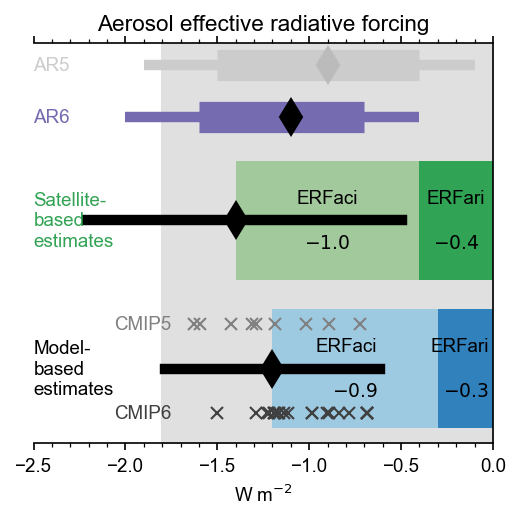

In [22]:
cool = ['#defdf7', '#9ecae1', '#3181bd']
warm = ['#f69274']

fig, ax1 = pl.subplots()
ariaci_mmm = (df.ERFari.mean()+df.ERFaci.mean())

# plot model estimates
ax1.barh(0, -0.3, color=cool[2])
ax1.barh(0, -0.9, left = -0.3, color=cool[1])
ax1.plot(-1.2, 0, marker='d', color='k', markersize=12)
#ariaci_u90 = np.nanstd((df.ERFari + df.ERFaci).values) * st.norm.ppf(0.95)
#ax1.plot((ariaci_mmm-ariaci_u90, ariaci_mmm+ariaci_u90), (0,0), color='k', lw=3)
ax1.plot((-1.2-np.sqrt(0.5**2+0.3**2),-1.2+np.sqrt(0.5**2+0.3**2)), (0,0), color='k', lw=5)

# plot satellite estimate
ax1.barh(1, -0.4, color='#31a354')
ax1.barh(1, -1.0, left=-0.4, color='#a1c99b')
ax1.plot(-1.4, 1, marker='d', color='k', markersize=12)
ax1.plot((-1.4-np.sqrt(0.4**2+0.7**2),-1.3+np.sqrt(0.4**2+0.7**2)), (1,1), color='k', lw=5)
ax1.text(-2.5, 1, 'Satellite-\nbased\nestimates', color='#31a354', ha='left', va='center')

# plot observational assessed range based on top-down/observational constraints
ax1.fill_between((-1.8, -0), -0.5, 2.5, color='#e0e0e0', zorder=0.6)

# plot CMIP5 and CMIP6 models : BOTH CONTAIN +5% FOR LAND SURFACE ADJUSTMENT
for model in df.Model:
    point = 1.05 * np.mean(df.ERFari[df.Model==model].values + df.ERFaci[df.Model==model].values)
    ax1.plot(point, -0.3, color='#404040', marker='x', zorder=10)
for erf in ERFCMIP5:
    ax1.plot(1.05 * erf, 0.3, color='#808080', marker='x', zorder=10)
ax1.text(-1.75, 0.3, 'CMIP5', color='#808080', ha='right', va='center')
ax1.text(-1.75, -0.3, 'CMIP6', color='#404040', ha='right', va='center')
ax1.text(-2.5, 0, 'Model-\nbased\nestimates', color='k', ha='left', va='center')
        
# plot AR6 ranges
#ax1.barh(2, -2, left=-0.4, color='purple')
ax1.plot((-2, -0.4), (1.7, 1.7), color='#756bb1', lw=5, solid_capstyle='butt')
ax1.plot((-1.6, -0.7), (1.7, 1.7), color='#756bb1', lw=15, solid_capstyle='butt')
ax1.plot(-1.1, 1.7, marker='d', color='k', markersize=12)
ax1.text(-2.5, 1.7, 'AR6', color='#756bb1', ha='left', va='center')

# plot AR5 ranges
ax1.plot((-1.9, -0.1), (2.05, 2.05), color='#cccccc', lw=5, solid_capstyle='butt')
ax1.plot((-1.5, -0.4), (2.05, 2.05), color='#cccccc', lw=15, solid_capstyle='butt')
ax1.plot(-0.9, 2.05, marker='d', color='#bbbbbb', markersize=12)
ax1.text(-2.5, 2.05, 'AR5', color='#cccccc', ha='left', va='center')

# labels
ax1.text(-0.02, 0.15, 'ERFari', va='center', ha='right')
ax1.text(-0.02, -0.15, '$-0.3$', va='center', ha='right')
ax1.text(0.5*(-1.0)+(-0.3), 0.15, 'ERFaci', va='center', ha='center')
ax1.text(0.5*(-0.9)+(-0.3), -0.15, '$-0.9$', va='center', ha='center')
ax1.text(-0.2, 1.15, 'ERFari', va='center', ha='center')
ax1.text(-0.2, 0.85, '$-0.4$', va='center', ha='center')
ax1.text(0.5*(-1.0)-0.4, 1.15, 'ERFaci', va='center', ha='center')
ax1.text(0.5*(-1.0)-0.4, 0.85, '$-1.0$', va='center', ha='center')

#ax1.yaxis.tick_right()
ax1.tick_params(axis='y', which='both', left=False, right=False)
#ax1.tick_params(axis='x', which='major', top=True, bottom=True, length=7)
#ax1.tick_params(axis='x', which='minor', top=True, bottom=True, length=4)
#ax1.minorticks_on()
ax1.spines['left'].set_visible(False)
ax1.set_ylim(-0.5,2.2)
ax1.set_xlim(-2.5,0)
ax1.axvline(0, color='k', lw=0.6)
ax1.set_yticks([])
ax1.set_xlabel('W m$^{-2}$')
ax1.set_title('Aerosol effective radiative forcing')

pl.tight_layout()
pl.savefig('../plots/fig7.5.png')
pl.savefig('../plots/fig7.5.pdf')